# Review the fit results from `sncosmo`

Authors: Midori Rollins and Melissa Graham

Create and examine the distributions for the fit parameters `z`, `t0`, `x0`, `x1`, and `c`.

Do this for all the potential SNIa, and only the unflagged light curves.

Review the light curves for potential SNIa that have outlier fit parameters.

## Set up and read in data

Import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Read in the `sncosmo` results.

The fit peak magnitudes are read in but not used in this notebook.

In [2]:
fnm = '2_all_potential_snia_fits/results_sncosmos.dat'
fit_cand = np.loadtxt(fnm, dtype='str', usecols=(0))
fit_est_z = np.loadtxt(fnm, dtype='float', usecols=(1))
fit_in_zlo = np.loadtxt(fnm, dtype='float', usecols=(2))
fit_in_zhi = np.loadtxt(fnm, dtype='float', usecols=(3))
fit_z = np.loadtxt(fnm, dtype='float', usecols=(4))
fit_ze = np.loadtxt(fnm, dtype='float', usecols=(5))
fit_t0 = np.loadtxt(fnm, dtype='float', usecols=(6))
fit_t0e = np.loadtxt(fnm, dtype='float', usecols=(7))
fit_x0 = np.loadtxt(fnm, dtype='float', usecols=(8))
fit_x0e = np.loadtxt(fnm, dtype='float', usecols=(9))
fit_x1 = np.loadtxt(fnm, dtype='float', usecols=(10))
fit_x1e = np.loadtxt(fnm, dtype='float', usecols=(11))
fit_c = np.loadtxt(fnm, dtype='float', usecols=(12))
fit_ce = np.loadtxt(fnm, dtype='float', usecols=(13))
fit_pmB = np.loadtxt(fnm, dtype='float', usecols=(14))
fit_pmg = np.loadtxt(fnm, dtype='float', usecols=(15))
fit_pmr = np.loadtxt(fnm, dtype='float', usecols=(16))
fit_pmi = np.loadtxt(fnm, dtype='float', usecols=(17))
del fnm

In [3]:
tx = np.where(fit_z <= 0.)[0]
print('Number of potential SNIa which were not fit by sncosmo: ', len(tx))
del tx
tx = np.where(fit_z > 0)[0]
print('Number of SNIa that were fit with sncosmo: ', len(tx))
del tx

Number of potential SNIa which were not fit by sncosmo:  4
Number of SNIa that were fit with sncosmo:  86


In [4]:
fnm = '2_all_potential_snia_fits/MLG_review_ratings.txt'
mlg_review_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mlg_review_flag = np.loadtxt(fnm, dtype='int', usecols=(1))
del fnm

In [5]:
fit_mlgflag = np.zeros(len(fit_cand), dtype='int') - 1
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mlg_review_candid)[0]
    if len(tx) == 1:
        fit_mlgflag[c] = mlg_review_flag[tx[0]]
    del tx

In [6]:
fnm = '2_all_potential_snia_fits/MR_review_ratings.txt'
mr_rating_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mr_rating_flag   = np.loadtxt(fnm, dtype='int', usecols=(1))
del fnm

In [7]:
fit_mrflag = np.zeros(len(fit_cand), dtype='int') - 1
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mr_rating_candid)[0]
    if len(tx) == 1:
        fit_mrflag[c] = mr_rating_flag[tx]
    del tx

## Explore the estimated and fit redshifts

The fit redshifts are usually lower than the estimated redshifts.

This makes sense since an intrinsic magnitude of -19.3 was used
to estimate the redshifts, and that will generally be an 
overestimate for host-reddedning SNIa and for non-SNIa that
are being included here.

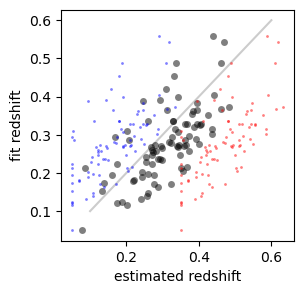

In [8]:
fig = plt.figure(figsize=(3, 3))
tx = np.where(fit_z > 0)[0]
plt.plot([0.1, 0.6], [0.1, 0.6], alpha=0.4, color='grey')
plt.plot(fit_est_z[tx], fit_z[tx], 'o', ms=5, mew=0, alpha=0.5, color='black')
plt.plot(fit_in_zlo[tx], fit_z[tx], 'o', ms=2, mew=0, alpha=0.5, color='blue')
plt.plot(fit_in_zhi[tx], fit_z[tx], 'o', ms=2, mew=0, alpha=0.5, color='red')
plt.xlabel('estimated redshift')
plt.ylabel('fit redshift')
plt.show()

## Explore the parameter distributions

Plot the parameter distributions for all the fits,
only rejecting fits with parameter values of -99.9, which
is the placeholder for "no fit".

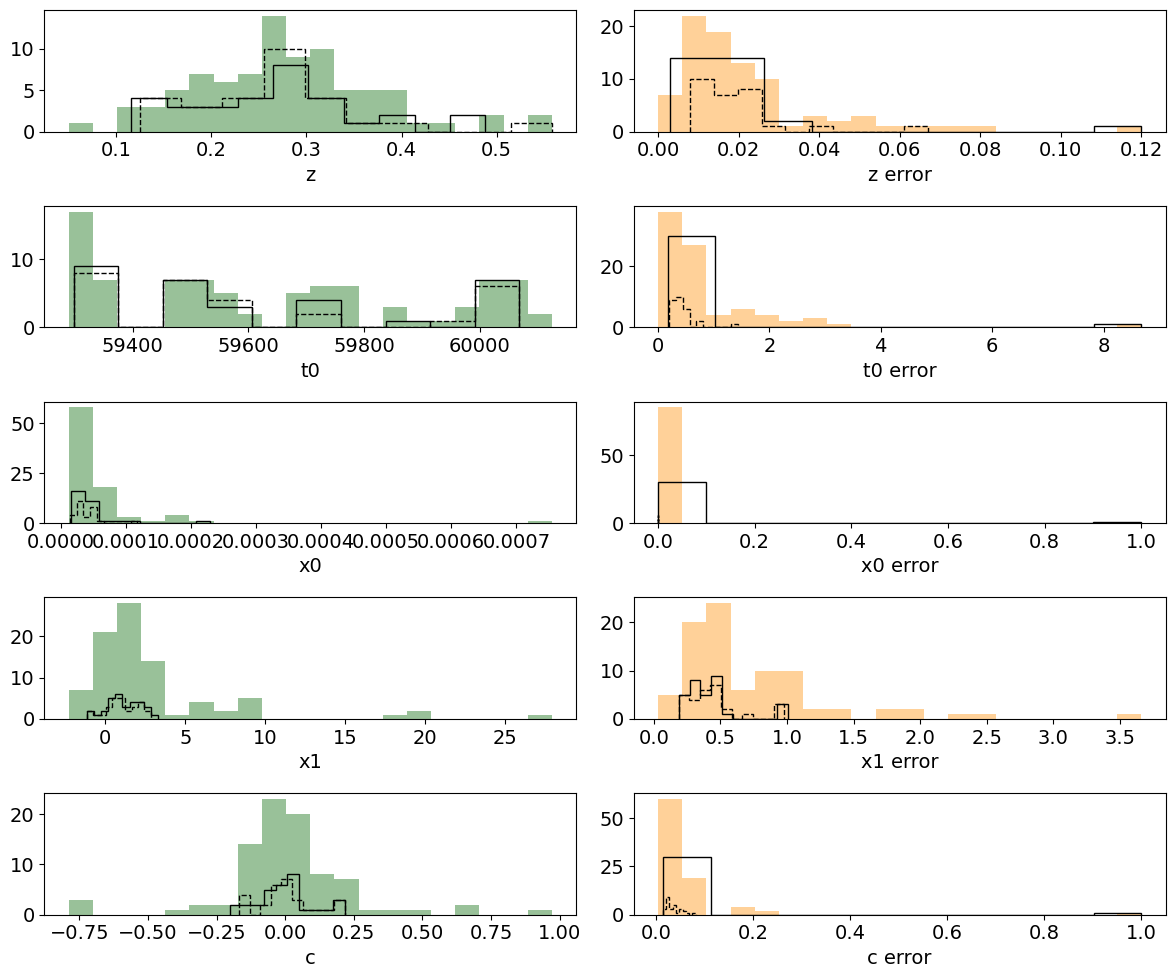

In [9]:
tx = np.where(fit_z > -90.0)[0]
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0))[0]
mrx = np.where((fit_z > -90.0) & (fit_mrflag == 0))[0]

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(5, 2, figsize=(12, 10))

ax[0,0].hist(fit_z[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[0,0].hist(fit_z[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[0,0].hist(fit_z[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[0,0].set_xlabel('z')

ax[0,1].hist(fit_ze[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[0,1].hist(fit_ze[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[0,1].hist(fit_ze[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[0,1].set_xlabel('z error')

ax[1,0].hist(fit_t0[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[1,0].hist(fit_t0[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[1,0].hist(fit_t0[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[1,0].set_xlabel('t0')

ax[1,1].hist(fit_t0e[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[1,1].hist(fit_t0e[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[1,1].hist(fit_t0e[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[1,1].set_xlabel('t0 error')

ax[2,0].hist(fit_x0[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[2,0].hist(fit_x0[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[2,0].hist(fit_x0[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[2,0].set_xlabel('x0')

ax[2,1].hist(fit_x0e[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[2,1].hist(fit_x0e[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[2,1].hist(fit_x0e[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[2,1].set_xlabel('x0 error')

ax[3,0].hist(fit_x1[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[3,0].hist(fit_x1[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[3,0].hist(fit_x1[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[3,0].set_xlabel('x1')

ax[3,1].hist(fit_x1e[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[3,1].hist(fit_x1e[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[3,1].hist(fit_x1e[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[3,1].set_xlabel('x1 error')

ax[4,0].hist(fit_c[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkgreen')
ax[4,0].hist(fit_c[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[4,0].hist(fit_c[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[4,0].set_xlabel('c')

ax[4,1].hist(fit_ce[tx],   bins=20, histtype='stepfilled', alpha=0.4, color='darkorange')
ax[4,1].hist(fit_ce[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[4,1].hist(fit_ce[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[4,1].set_xlabel('c error')

fig.tight_layout()
fig.show()

Plot distributions for only the potential SNIa that are NOT flagged.

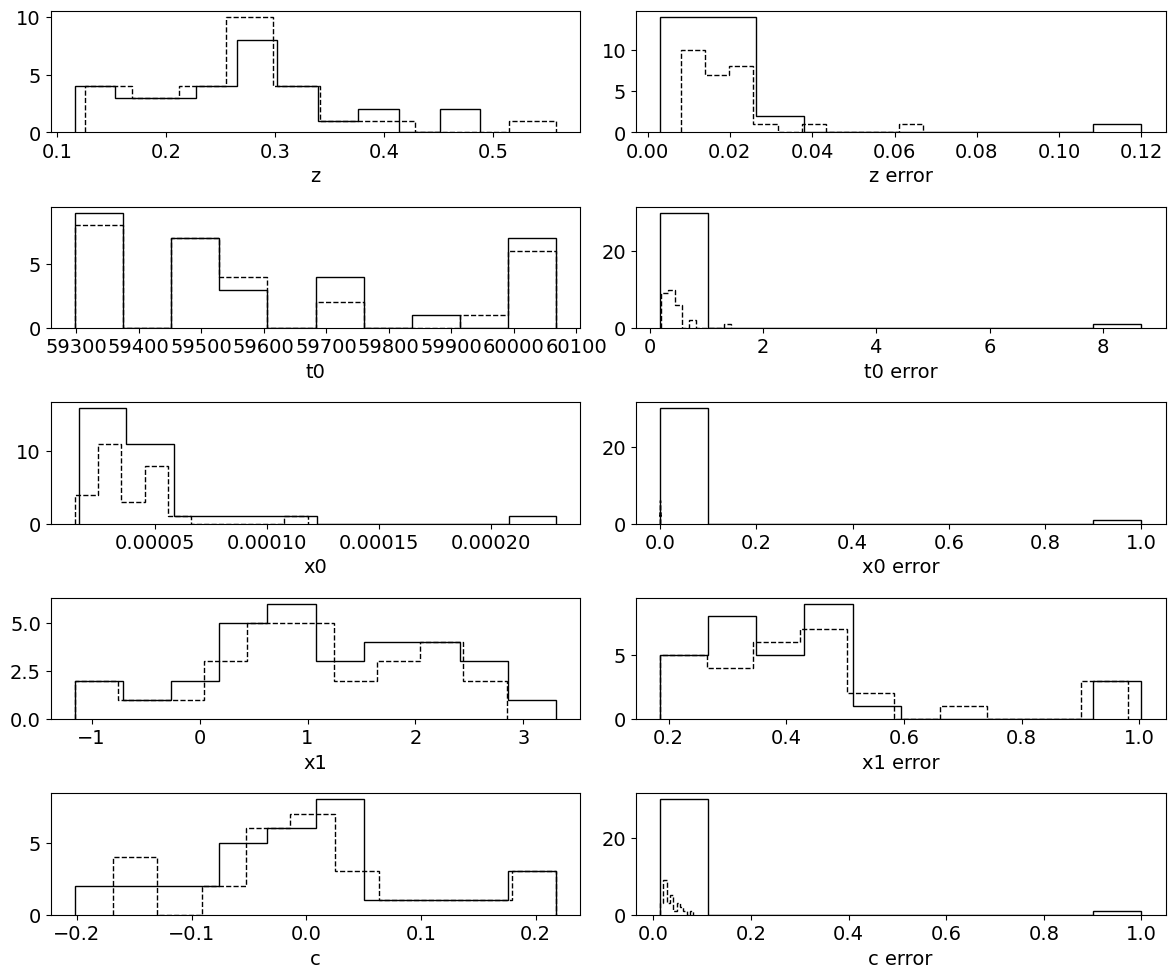

In [10]:
mlgx = np.where((fit_z > -90.0) & (fit_mlgflag == 0))[0]
mrx = np.where((fit_z > -90.0) & (fit_mrflag == 0))[0]

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(5, 2, figsize=(12, 10))

ax[0,0].hist(fit_z[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[0,0].hist(fit_z[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[0,0].set_xlabel('z')

ax[0,1].hist(fit_ze[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[0,1].hist(fit_ze[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[0,1].set_xlabel('z error')

ax[1,0].hist(fit_t0[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[1,0].hist(fit_t0[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[1,0].set_xlabel('t0')

ax[1,1].hist(fit_t0e[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[1,1].hist(fit_t0e[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[1,1].set_xlabel('t0 error')

ax[2,0].hist(fit_x0[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[2,0].hist(fit_x0[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[2,0].set_xlabel('x0')

ax[2,1].hist(fit_x0e[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[2,1].hist(fit_x0e[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[2,1].set_xlabel('x0 error')

ax[3,0].hist(fit_x1[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[3,0].hist(fit_x1[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[3,0].set_xlabel('x1')

ax[3,1].hist(fit_x1e[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[3,1].hist(fit_x1e[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[3,1].set_xlabel('x1 error')

ax[4,0].hist(fit_c[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[4,0].hist(fit_c[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[4,0].set_xlabel('c')

ax[4,1].hist(fit_ce[mlgx], bins=10, histtype='step', ls='solid', color='black')
ax[4,1].hist(fit_ce[mrx],  bins=10, histtype='step', ls='dashed', color='black')
ax[4,1].set_xlabel('c error')

fig.tight_layout()
fig.show()

## Explore candidates with outlier parameter values

For values, there's only one outlier:
 * `x0` > 0.00015
 
For errors, there are a few outliers
 * `ze` > 0.05
 * `t0e` > 2
 * `x0e` > 0.1
 * `x1e` > 0.6
 * `ce` > 0.15

Identify the candidates which have outlier values in the parameter and error distributions.

In [11]:
print('Candidates with fit outlier values')

tx_x0 = np.where((fit_mlgflag == 0) & (fit_x0 > 0.00015))[0]
print('x0: ', len(tx_x0), fit_cand[tx_x0])
del tx_x0

tx_ze  = np.where((fit_mlgflag == 0) & (fit_ze > 0.05))[0]
tx_t0e = np.where((fit_mlgflag == 0) & (fit_t0e > 2))[0]
tx_x0e = np.where((fit_mlgflag == 0) & (fit_x0e > 0.1))[0]
tx_x1e = np.where((fit_mlgflag == 0) & (fit_x1e > 0.6))[0]
tx_ce  = np.where((fit_mlgflag == 0) & (fit_ce > 0.15))[0]
print('ze: ', len(tx_ze), fit_cand[tx_ze])
print('t0e: ', len(tx_t0e), fit_cand[tx_t0e])
print('x0e: ', len(tx_x0e), fit_cand[tx_x0e])
print('x1e: ', len(tx_x1e), fit_cand[tx_x1e])
print('ce: ', len(tx_ce), fit_cand[tx_ce])
del tx_ze, tx_t0e, tx_x0e, tx_x1e, tx_ce

tx = np.where((fit_mlgflag == 0) & 
              ((fit_x0 > 0.00015) | 
               (fit_ze > 0.05) | 
               (fit_t0e > 2) | 
               (fit_x0e > 0.1) | 
               (fit_x1e > 0.6) | 
               (fit_ce > 0.15)))[0]
print('any: ', len(tx))
print('candidates: ', fit_cand[tx])
del tx

Candidates with fit outlier values
x0:  1 ['DC22iykha']
ze:  1 ['DC22iykha']
t0e:  1 ['DC22iykha']
x0e:  1 ['DC22iykha']
x1e:  3 ['DC21esjb' 'DC22iykha' 'DC23krtnc']
ce:  1 ['DC22iykha']
any:  3
candidates:  ['DC21esjb' 'DC22iykha' 'DC23krtnc']


### DC21esjb

<img src="1_all_potential_snia_lcs/DC21esjb.png" width="400"/><br>

The first epoch is erroneous.
https://decat-webap.lbl.gov/decatview.py/cand/DC21esjb 

Unsure how sncosmo knew to leave it out... but the fit is OK.

<img src="2_all_potential_snia_fits/DC21esjb_fit.png" width="400"/><br>


### DC22iykha

<img src="1_all_potential_snia_lcs/DC22iykha.png" width="400"/><br>

This certainly seems to be a transient, looks SNIa-like.

Suspect that sncosmo ran into its lower boundary on redshift when fitting this object.

In [12]:
cx = np.where(fit_cand == 'DC22iykha')[0]
print(fit_z[cx[0]],  fit_ze[cx[0]])
print(fit_t0[cx[0]], fit_t0e[cx[0]])
print(fit_x0[cx[0]], fit_x0e[cx[0]])
print(fit_x1[cx[0]], fit_x1e[cx[0]])
print(fit_c[cx[0]],  fit_ce[cx[0]])
print(fit_pmB[cx[0]], fit_pmg[cx[0]], fit_pmr[cx[0]], fit_pmi[cx[0]])

0.154 0.12
59871.43 8.68
0.00022904 1.0
1.815 1.0039
-0.1124 1.0
19.5975 19.6853 19.9422 20.5899


### DC23krtnc

<img src="1_all_potential_snia_lcs/DC23krtnc.png" width="400"/><br>

This one barely looks well-sampled enough to not be flagged, so not surprised
it was an outlier.

<img src="2_all_potential_snia_fits/DC23krtnc_fit.png" width="400"/><br>


In [14]:
cx = np.where(fit_cand == 'DC23krtnc')[0]
print(fit_z[cx[0]],  fit_ze[cx[0]])
print(fit_t0[cx[0]], fit_t0e[cx[0]])
print(fit_x0[cx[0]], fit_x0e[cx[0]])
print(fit_x1[cx[0]], fit_x1e[cx[0]])
print(fit_c[cx[0]],  fit_ce[cx[0]])
print(fit_pmB[cx[0]], fit_pmg[cx[0]], fit_pmr[cx[0]], fit_pmi[cx[0]])

0.285 0.028
60068.08 0.72
2.9495e-05 1.7729e-06
2.8439 0.9291
0.0098 0.0485
21.8176 21.8675 22.002 22.607


## Summary

All but three of the unflagged candidates seem to end up fit with reasonable parameters
that are like the rest of the group.
